<a href="https://colab.research.google.com/github/fernandovieira1/ML-e-DS-com-Python-de-A-a-Z/blob/master/PARTE_9_series_temporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install pmdarima

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
## Qtde passageiros

# dataset = pd.read_csv('AirPassengers.csv') # Colab
dataset = pd.read_csv('/Users/fernandovieira/OneDrive/1. Educacao/INFO E ESTAT/IA Expert/ML-e-DS-com-Python-de-A-a-Z/Bases de dados/AirPassengers.csv') # Mac

In [4]:
dataset

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [6]:
# converter coluna 'Month' (object) em índice (de datas: YYYY/MM/DD)
from datetime import datetime
from pandas.io.pytables import IndexCol

dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
dataset = pd.read_csv('/Users/fernandovieira/OneDrive/1. Educacao/INFO E ESTAT/IA Expert/ML-e-DS-com-Python-de-A-a-Z/Bases de dados/AirPassengers.csv', parse_dates=['Month'],
                      index_col='Month', date_parser=dateparse)

/var/folders/7l/n994pw8s5t9_9kfwf_p6jjqw0000gn/T/ipykernel_85853/3586640264.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')


In [7]:
dataset.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [9]:
# converter um pd.df em pd.series
time_series = dataset['#Passengers']

In [10]:
time_series

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

In [11]:
type(time_series)

pandas.core.series.Series

In [12]:
time_series[1]

118

In [13]:
time_series['1949-02']

Month
1949-02-01    118
Name: #Passengers, dtype: int64

In [14]:
time_series.index.min()

Timestamp('1949-01-01 00:00:00')

In [15]:
time_series.index.max()

Timestamp('1960-12-01 00:00:00')

In [16]:
sns.set(rc={'figure.figsize':(11.7, 7)})

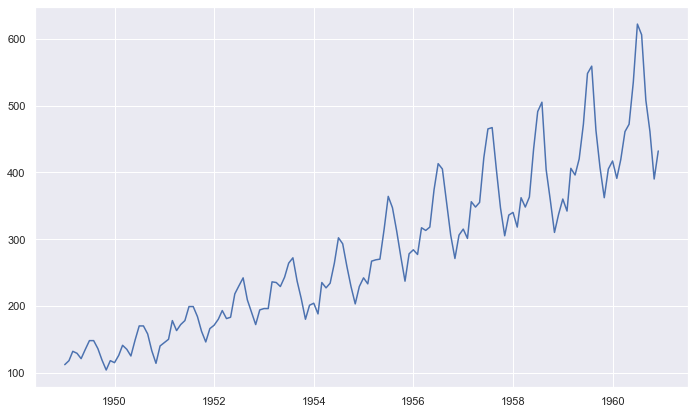

In [17]:
plt.plot(time_series)

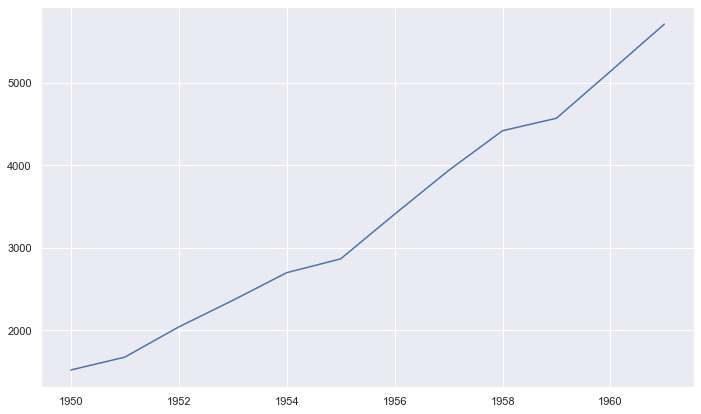

In [18]:
time_series_ano = time_series.resample('A').sum()

plt.plot(time_series_ano)

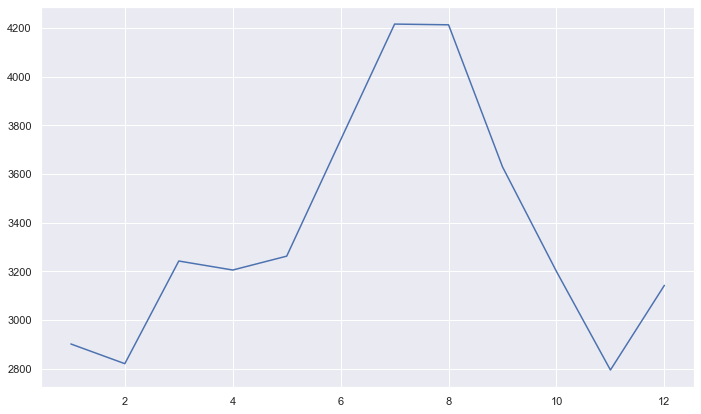

In [19]:
time_series_mes = time_series.groupby([lambda x: x.month]).sum()
plt.plot(time_series_mes)

Decomposição da série

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposicao = seasonal_decompose(time_series)

In [21]:
tendencia = decomposicao.trend
sazonal = decomposicao.seasonal
aleatorio = decomposicao.resid

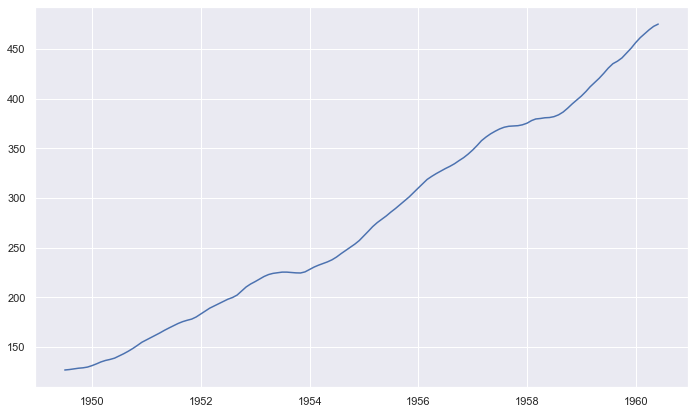

In [22]:
plt.plot(tendencia)

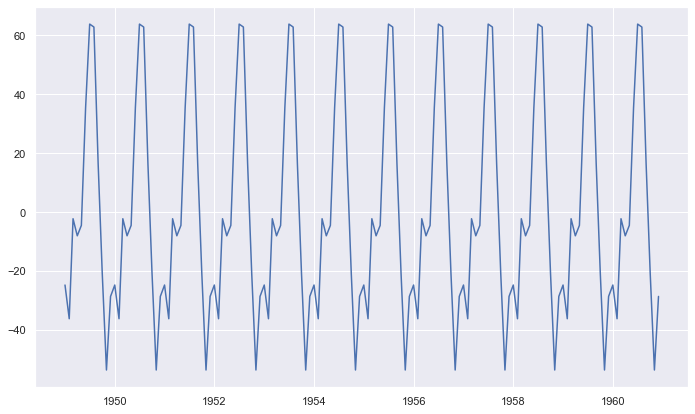

In [23]:
plt.plot(sazonal)

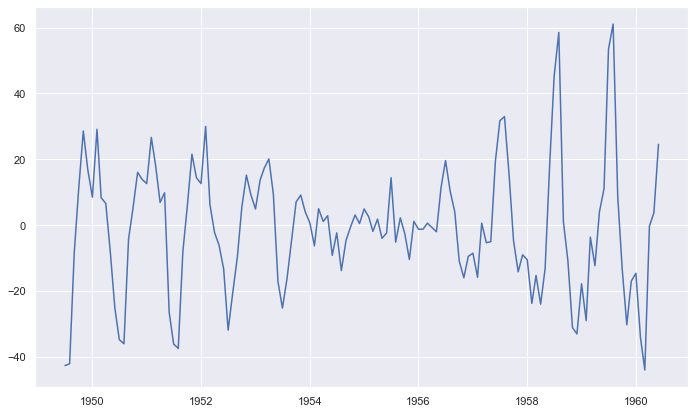

In [24]:
plt.plot(aleatorio)

Previsões com ARIMA

In [25]:
from pmdarima.arima import auto_arima

In [26]:
model = auto_arima(time_series, order=(2, 1, 2)) # testar a ordem manualmente

In [29]:
predictions = model.predict(n_periods=24)
predictions

array([467.57379052, 490.49453635, 509.13691555, 492.55474763,
       495.30596219, 475.94780547, 476.33984199, 475.5521401 ,
       472.3538198 , 483.88966667, 475.57018416, 485.92153089,
       479.13362527, 480.98743494, 482.22140669, 476.21103552,
       483.94282223, 475.8473667 , 482.79426459, 479.01196985,
       479.51864373, 482.44945929, 476.97395847, 483.51102716])

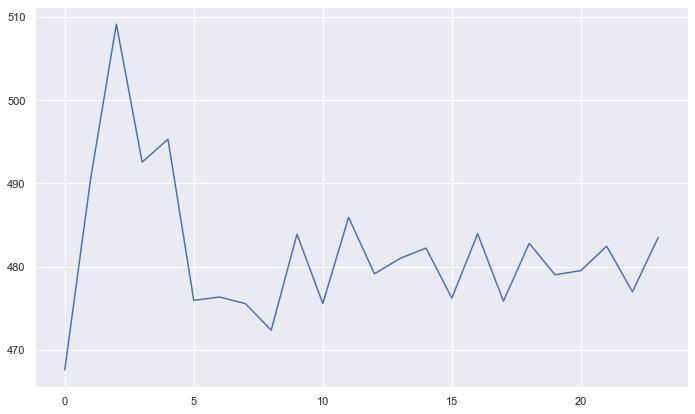

In [30]:
plt.plot(predictions)

In [31]:
# Fazer o treinamento
len(time_series)

144

In [32]:
train = time_series[:130]
train.shape

(130,)

In [33]:
train.index.min(), train.index.max()

(Timestamp('1949-01-01 00:00:00'), Timestamp('1959-10-01 00:00:00'))

In [34]:
test = time_series[130:]
test.shape

(14,)

In [35]:
test.index.min(), test.index.max()

(Timestamp('1959-11-01 00:00:00'), Timestamp('1960-12-01 00:00:00'))

In [36]:
model2 = auto_arima(train, suppress_warnings=True)

In [ ]:
# jeito 1

In [50]:
prediction = pd.DataFrame(model2.predict(n_periods=14), index=test.index)
prediction.columns = ['pasengers_predictions']
prediction

,pasengers_predictions
Month,
1959-11-01,357.690515
1959-12-01,334.857456
1960-01-01,342.488599
1960-02-01,375.944537
1960-03-01,424.126295
1960-04-01,473.151453
1960-05-01,510.388391
1960-06-01,527.724256
1960-07-01,523.268343


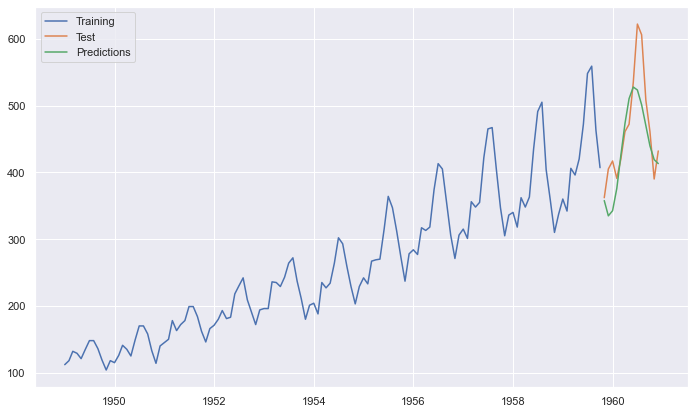

In [51]:
plt.plot(train, label='Training')
plt.plot(test, label='Test')
plt.plot(prediction, label='Predictions')
plt.legend()

In [ ]:
# jeito 2

In [46]:
prediction = pd.DataFrame(model2.predict(n_periods=14), index=test.index)
prediction.columns = ['pasengers_predictions']
prediction['pasengers_predictions'] = prediction['pasengers_predictions'].round(0)
prediction['passengers_test'] = test
prediction['dif_pred_test'] = prediction['pasengers_predictions']-prediction['passengers_test']
prediction

,pasengers_predictions,passengers_test,dif_pred_test
Month,,,
1959-11-01,358.0,362,-4.0
1959-12-01,335.0,405,-70.0
1960-01-01,342.0,417,-75.0
1960-02-01,376.0,391,-15.0
1960-03-01,424.0,419,5.0
1960-04-01,473.0,461,12.0
1960-05-01,510.0,472,38.0
1960-06-01,528.0,535,-7.0
1960-07-01,523.0,622,-99.0


In [48]:
prediction['dif_pred_test'].sum()

-369.0

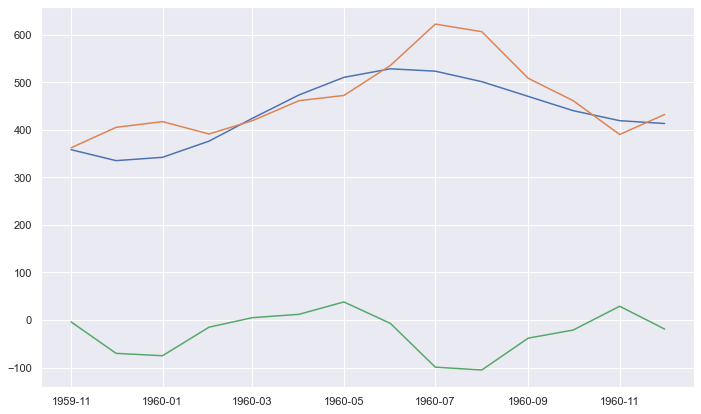

In [49]:
plt.plot(prediction)